## Importing the dependencies

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import cv2
import os
import tensorflow

from keras.models import Sequential
from keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, Dense, RandomFlip, RandomTranslation, RandomRotation, GlobalAveragePooling2D, Input, RandomZoom, Rescaling, MaxPooling2D, Flatten, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard, LearningRateScheduler, CSVLogger

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


## Importing the datasets

In [32]:
# Data path
path_train = ('../Brain-Tumor-Classification-Data Set/Training')
path_test = ('../Brain-Tumor-Classification-Data Set/Testing')

# Defining the image size
img_size = 300

# Defining a function to load the images
def load_images(path, img_size):
    """
    This function loads the images from the path and resizes them to the specified size
    """
    labels = []
    img_list = []
    for i in os.listdir(path):
        dir_path = os.path.join(path, i)  # Use os.path.join for correct path construction
        for j in os.listdir(dir_path):
            img_path = os.path.join(dir_path, j)
            img = cv2.imread(img_path)
            if img is not None:
                resized_img = cv2.resize(img, (img_size, img_size))
                img_list.append(resized_img)
                labels.append(i)
            else:
                print(f"Failed to load image: {img_path}") 
    return img_list, labels

# Loading the training images
train_img, train_labels = load_images(path_train, img_size)

# Loading the testing images
test_img, test_labels = load_images(path_test, img_size)

# Converting the images to numpy arrays
train_img = np.array(train_img)
test_img = np.array(test_img)


In [3]:
# Checking the shape of the images
print(f"Train images shape: {train_img.shape}")
print(f"Test images shape: {test_img.shape}")

# Displaying an image from each of the classes in the training and testing set
unique_train_labels = np.unique(train_labels)
print(f"Unique train labels: {unique_train_labels}")

unique_test_labels = np.unique(test_labels)
print(f"Unique test labels: {unique_test_labels}")

Train images shape: (5712, 300, 300, 3)
Test images shape: (1311, 300, 300, 3)
Unique train labels: ['glioma_tumor' 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']
Unique test labels: ['glioma_tumor' 'meningioma_tumor' 'no_tumor' 'pituitary_tumor']


## Visualization of the datas

<Figure size 640x480 with 0 Axes>

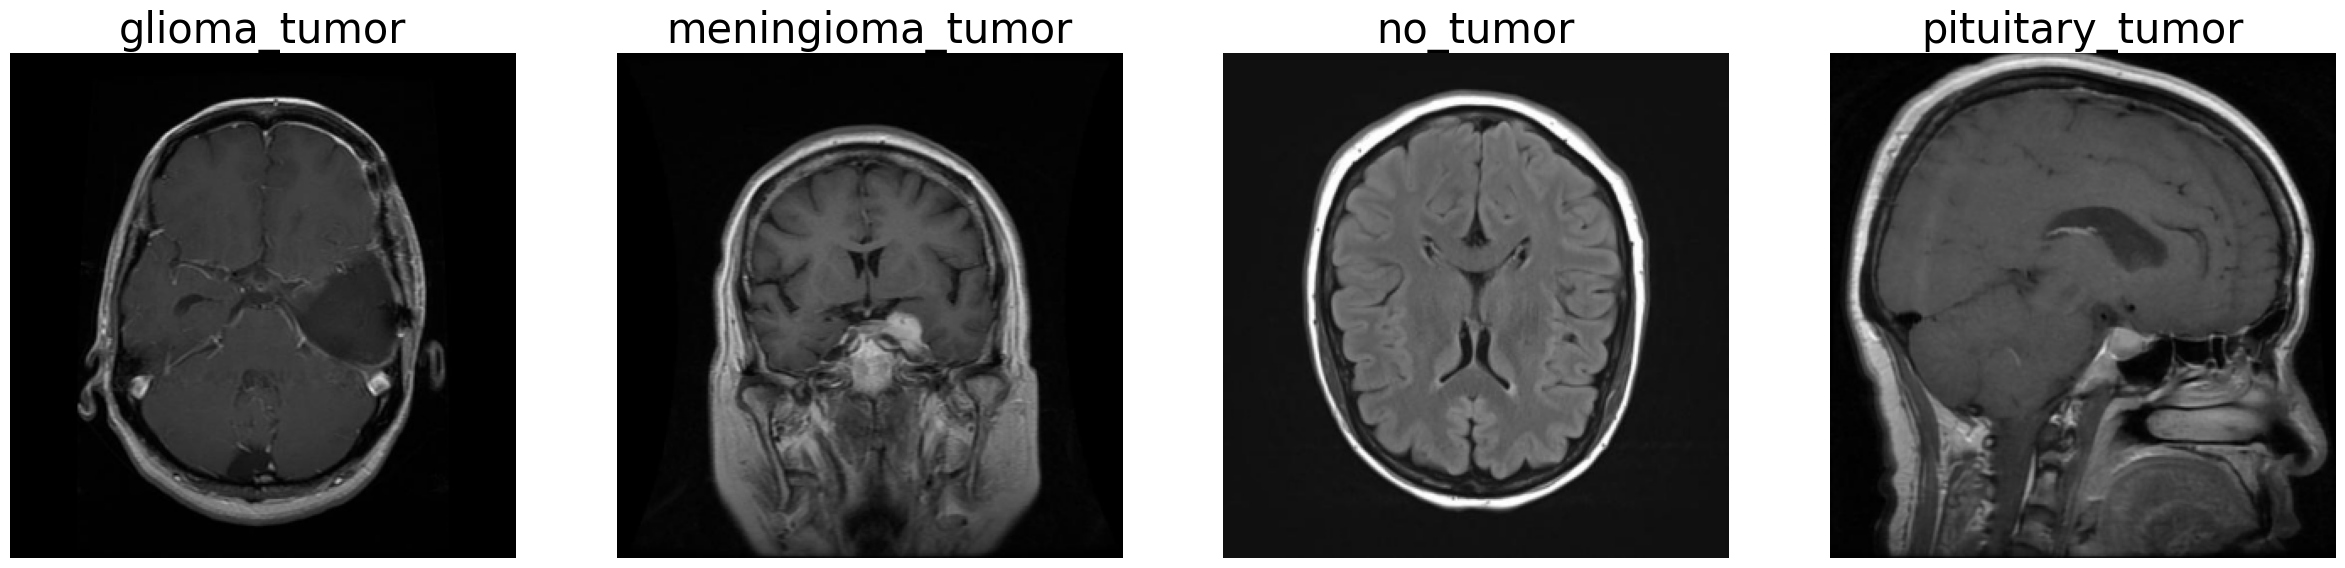

In [34]:
# Adjust subplot parameters to prevent overlap
plt.subplots_adjust(wspace=0.4)  

# Set the figure size
plt.figure(figsize=(30, 30))

# Display an image from each of the classes in the training set
for i, label in enumerate(unique_train_labels):
    matching_indices = [j for j, x in enumerate(train_labels) if x == label]
    if matching_indices:
        random_index = np.random.choice(matching_indices)
        plt.subplot(1, 4, i+1)
        plt.imshow(train_img[random_index])
        plt.title(label, fontsize=30)
        plt.axis('off')
    else:
        print(f"No images found for label {label}")

Train Data Count: 
Glioma:  1321
Meningioma:  1339
No Tumor:  1595
Pituitary:  1457


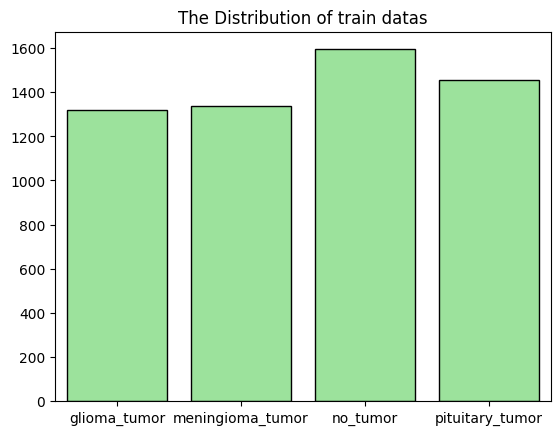


Test Data Count: 
Glioma:  300
Meningioma:  306
No Tumor:  405
Pituitary:  300


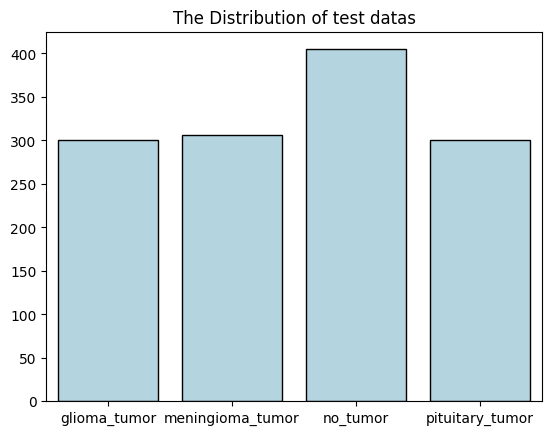

In [35]:
# Getting the distribution of labels of the dataset

# defining counter function to count the number of datas

def counter(path):
    c = 0
    for p in os.scandir(path):
        if p.is_file():
            c += 1
    return c


# count of all the datas in all the classes for train data

glioma_train_path = "../Brain-Tumor-Classification-Data Set/Training/glioma_tumor"
meningioma_train_path = (
    "../Brain-Tumor-Classification-Data Set/Training/meningioma_tumor"
)
no_tumor_train_path = "../Brain-Tumor-Classification-Data Set/Training/no_tumor"
pituitary_train_path = "../Brain-Tumor-Classification-Data Set/Training/pituitary_tumor"

glioma_train_count = counter(glioma_train_path)
meningioma_train_count = counter(meningioma_train_path)
no_tumor_train_count = counter(no_tumor_train_path)
pituitary_train_count = counter(pituitary_train_path)

print("Train Data Count: ")
print("Glioma: ", glioma_train_count)
print("Meningioma: ", meningioma_train_count)
print("No Tumor: ", no_tumor_train_count)
print("Pituitary: ", pituitary_train_count)

# visualization of train datas in a bar graph

sns.barplot(x = unique_train_labels, y=[glioma_train_count, meningioma_train_count, no_tumor_train_count, pituitary_train_count], color='lightgreen', edgecolor='black')
plt.title("The Distribution of train datas")
plt.show()

# count of all the datas in all the classes for test data

glioma_test_path = "../Brain-Tumor-Classification-Data Set/Testing/glioma_tumor"
meningioma_test_path = "../Brain-Tumor-Classification-Data Set/Testing/meningioma_tumor"
no_tumor_test_path = "../Brain-Tumor-Classification-Data Set/Testing/no_tumor"
pituitary_test_path = "../Brain-Tumor-Classification-Data Set/Testing/pituitary_tumor"

glioma_test_count = counter(glioma_test_path)
meningioma_test_count = counter(meningioma_test_path)
no_tumor_test_count = counter(no_tumor_test_path)
pituitary_test_count = counter(pituitary_test_path)

print("\nTest Data Count: ")
print("Glioma: ", glioma_test_count)
print("Meningioma: ", meningioma_test_count)
print("No Tumor: ", no_tumor_test_count)
print("Pituitary: ", pituitary_test_count)

# visualization of train datas in a bar graph

sns.barplot(x = unique_train_labels, y=[glioma_test_count, meningioma_test_count, no_tumor_test_count, pituitary_test_count], color='lightblue', edgecolor='black')
plt.title("The Distribution of test datas")
plt.show()

# # visualizing the distribution of dataset in each class
# plt.figure(figsize=(17, 8))
# lis = ["Train", "Test"]
# for i, j in enumerate([train_labels, test_labels]):
#     plt.subplot(1, 2, i + 1)
#     sns.countplot(x=j)
#     plt.xlabel(lis[i])
# plt.title("Distribution of Labels")


## Preprocessing the data

In [6]:
# # Normalizing the images
# train_img = train_img/255
# test_img = test_img/255

# # Shuffling the data to make it random 
# from sklearn.utils import shuffle
# train_img, train_labels = shuffle(train_img, train_labels, random_state=42)

# # Split the training data into training and validation data
# X_train, X_val, y_train, y_val = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.1)

In [36]:
# Splitting the data into training and validation data

train, validation = image_dataset_from_directory(directory = "../Brain-Tumor-Classification-Data Set/Training", batch_size=32, image_size=(256, 256), validation_split=0.2, subset='both', seed=234)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Using 1142 files for validation.


In [37]:
# Developing a CNN Architecture:

model = Sequential([
    Input(shape=(256, 256, 3), batch_size=32),
    Rescaling(1./255.),
    RandomFlip('horizontal'),
    RandomRotation(0.2),
    #RandomZoom(0.2),
    #RandomTranslation(height_factor=0.25,width_factor=0.25, fill_mode='reflect', interpolation='bilinear'),
    
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', name='Conv2D_1'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='Conv2D_2'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='Conv2D_3'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', name='Conv2D_4'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    #GlobalAveragePooling2D(),
    Flatten(),
    
    Dense(units=32, activation='relu'),
    #BatchNormalization(),
    Dense(units=64, activation='relu'),
    #Dropout(0.4),
    Dense(units=128, activation='relu'),
    
    #BatchNormalization(),
    Dense(units=256, activation='relu'),
    #BatchNormalization(),
    Dense(units=128, activation='relu'),
    #BatchNormalization(),
    #Dropout(0.4),
    Dense(units=len(unique_train_labels), activation='softmax')
    
])

In [38]:
# Enhancing the model with improvements:

ES = EarlyStopping(monitor='val_accuracy', patience=10, verbose=2, restore_best_weights=True, mode='max', min_delta=0)
MP = ModelCheckpoint(filepath='../Models/brain_tumor_best_model.keras', monitor='val_accuracy', verbose=2, save_best_only=True, mode='max')
RP = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=2, min_lr=0.0001, factor=0.2)

In [39]:
# Complie the model before fitting:

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(train, validation_data=validation, epochs=25, callbacks=[ES, MP, RP])

Epoch 1/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.6323 - loss: 0.8979
Epoch 1: val_accuracy improved from -inf to 0.35026, saving model to ../Models/brain_tumor_best_model.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 35s 233ms/step - accuracy: 0.6328 - loss: 0.8967 - val_accuracy: 0.3503 - val_loss: 1.2856 - learning_rate: 0.0010
Epoch 2/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.8038 - loss: 0.5194
Epoch 2: val_accuracy improved from 0.35026 to 0.60683, saving model to ../Models/brain_tumor_best_model.keras
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 232ms/step - accuracy: 0.8038 - loss: 0.5194 - val_accuracy: 0.6068 - val_loss: 0.9909 - learning_rate: 0.0010
Epoch 3/25
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.8275 - loss: 0.4736
Epoch 3: val_accuracy did not improve from 0.60683
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 241ms/step - accuracy: 0.8275 - loss: 0.4734 - val_accuracy: 0.5972 - val_loss: 0.9740 - learning_rate: 0.0010
Epoch 4/25
143/143 ━━━━━━━━━━━━━━━

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


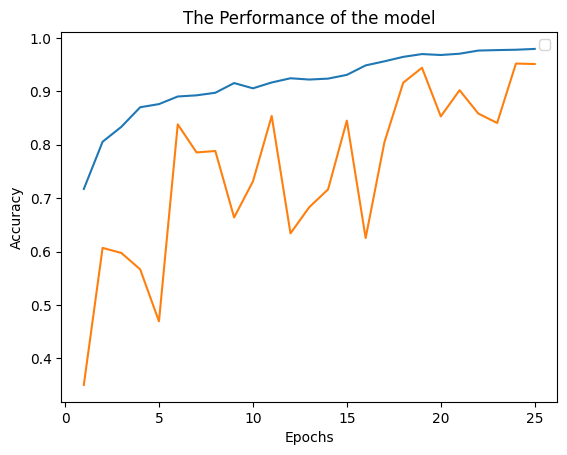

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


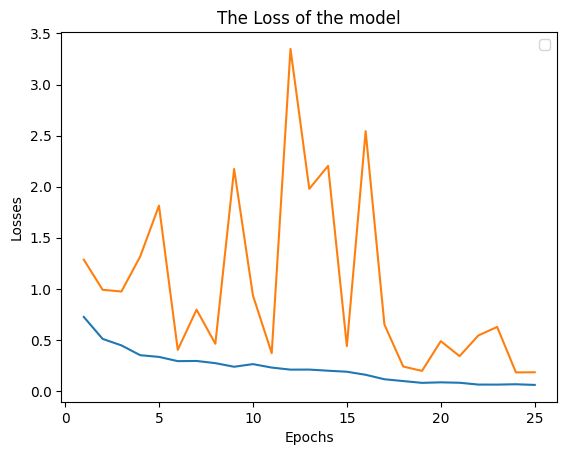

In [40]:
# Analyzing the performance of the model

sns.lineplot(x = np.arange(1, len(history.history['accuracy'])+1), y = history.history['accuracy'])
sns.lineplot(x = np.arange(1, len(history.history['val_accuracy'])+1), y = history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("The Performance of the model")
plt.legend()
plt.show()

sns.lineplot(x = np.arange(1, len(history.history['loss'])+1), y = history.history['loss'])
sns.lineplot(x = np.arange(1, len(history.history['val_loss'])+1), y = history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title("The Loss of the model")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1


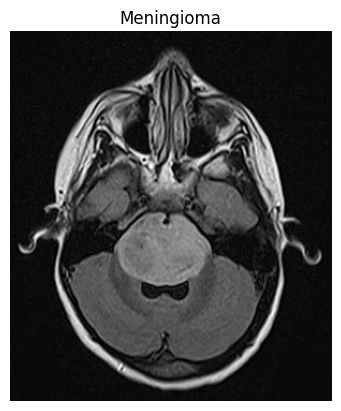

In [51]:
# Prediction

from tensorflow.keras.models import load_model

predictor = load_model('../Models/brain_tumor_best_model.keras')

image = '../Brain-Tumor-Classification-Data Set/Testing/meningioma_tumor/Te-me_0019.jpg'

image = cv2.imread(image)

image1 = cv2.resize(image, (256, 256))
batch_size = 32
batch = np.stack([image1] * batch_size, axis=0)

result = model.predict(batch)
result = (np.argmax(result, axis=1))[0]

label = ""

print(result)

if result == 0:
    label += "Glioma"
elif result == 1:
    label += "Meningioma"
elif result == 2:
    label += "No Tumor"
elif result == 3:
    label += "Pituitary"

plt.imshow(image)
plt.title(label)
plt.axis('off')
plt.show()